# Implementing sa-RIAF model on grtrans

In this notebook I'll learn to use *grtrans* with the sa-riaf model. This is an accretion flow model that we will use as base for our accretion-jet model in the future.


## Testing HARM model first

Here I'm following the tutorial on github

In [1]:
import grtrans_batch as gr
import matplotlib.pyplot as plt

In [2]:
x = gr.grtrans()

### Images

In [3]:
x.run_pgrtrans(standard=1,nvals=4,fname='HARM',nfreq=1,fmin=2.3e11,fmax=2.3e11,ename='POLSYNCHTH',
               spin=0.9375,nn=[150,150, 400],uout=0.04,mbh=4e6, mdotmin=4e15, mdotmax=4e15,nmdot=1, 
               nmu=1,mumin=.6428,mumax=.6428, gridvals=[-13.,13.,-13.,13.], fhfile='dump040', fdfile='dump',
               findf=40,fnt=1,muval=1./4.,gmin=1.)

printing grtrans argument list
1 0.6428 0.6428 1 -0.5 0.9375 0.04 1.0 1.0 2 [-13.0, 13.0, -13.0, 13.0] [150, 150, 400] 1 22500 HARM 5.0 1 1 1 4000000000000000.0 4000000000000000.0 POLSYNCHTH 4000000.0 1 230000000000.0 230000000000.0 0.25 1.0 100000.0 3.5 3.5 0.02 const T 4 lsoda 1 0 0  dump dump040 dump0000rr2.bin thickdiskrr2 1 40 1 1 500 100 500 0 1 0 1.5 6.0 10000.0 1.0 6.0 0.0001 10000.0 3.3333333333333332e+16 9e+19 10000.0 0.4 1.7 0.1 30000000.0 80000.0 2.9 10.0 0 0.0 0.0 -1.0 100000000.0 -10.0 10.0 0.0 10000.0 1.0 10000000000.0 [1, 1, 1, 1, 1, 1, 1] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [1.0, 1.0] 2


In [6]:
x.read_grtrans_output()

AttributeError: 'grtrans' object has no attribute 'ofile'

In [7]:
x.ivals

array([[[ 8.84002294e-09],
        [ 1.21814452e-08],
        [ 1.52131374e-08],
        ...,
        [ 3.88432238e-11],
        [ 6.74169678e-11],
        [ 9.64419655e-11]],

       [[-1.52015261e-10],
        [-1.15164289e-09],
        [ 2.82743884e-10],
        ...,
        [ 1.49870838e-12],
        [-7.65580221e-12],
        [ 9.72650085e-12]],

       [[ 5.30859912e-10],
        [ 1.13747414e-11],
        [-8.68687955e-10],
        ...,
        [ 1.84376256e-12],
        [-1.32928163e-12],
        [-7.03238574e-13]],

       [[ 3.62970015e-10],
        [ 5.28580957e-10],
        [ 6.22527474e-10],
        ...,
        [-3.26712155e-13],
        [-9.08868412e-13],
        [-1.47597830e-12]]])

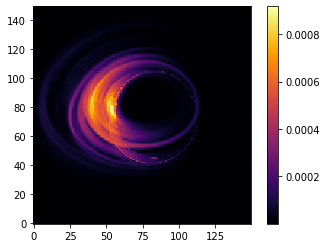

In [4]:
ax = x.disp_pgrtrans_image(-1)

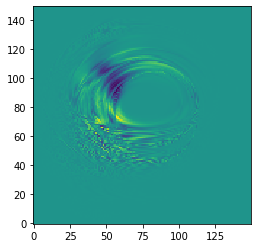

In [5]:
x.disp_pgrtrans_image(-1,2)

### Calculating spectra

To calculate spectra re-run the *x.run_pgrtrans* cell and change:

- nfreq = 10
- fmin = 5e10
- fmax = 1e13

In [6]:
x.run_pgrtrans(standard=1,nvals=1,fname='HARM',nfreq=10,fmin=5e10,fmax=1e13,ename='POLSYNCHTH',
               spin=0.9375,nn=[150,150, 400],uout=0.04,mbh=4e6, mdotmin=4e15, mdotmax=4e15,nmdot=1, 
               nmu=1,mumin=.6428,mumax=.6428, gridvals=[-13.,13.,-13.,13.], fhfile='dump040', fdfile='dump',
               findf=40,fnt=1,muval=1./4.,gmin=1.)

printing grtrans argument list
1 0.6428 0.6428 1 -0.5 0.9375 0.04 1.0 1.0 2 [-13.0, 13.0, -13.0, 13.0] [150, 150, 400] 1 22500 HARM 5.0 1 1 1 4000000000000000.0 4000000000000000.0 POLSYNCHTH 4000000.0 10 50000000000.0 10000000000000.0 0.25 1.0 100000.0 3.5 3.5 0.02 const T 1 lsoda 1 0 0  dump dump040 dump0000rr2.bin thickdiskrr2 1 40 1 1 500 100 500 0 1 0 1.5 6.0 10000.0 1.0 6.0 0.0001 10000.0 3.3333333333333332e+16 9e+19 10000.0 0.4 1.7 0.1 30000000.0 80000.0 2.9 10.0 0 0.0 0.0 -1.0 100000000.0 -10.0 10.0 0.0 10000.0 1.0 10000000000.0 [1, 1, 1, 1, 1, 1, 1] [1.0, 1.0] 2


In [7]:
x.calc_spec_pgrtrans(x.nx)

In [8]:
x.ivals

array([[[5.17435546e-06, 1.03394507e-06, 6.37296154e-08, ...,
         6.00681629e-20, 3.40910894e-24, 2.46136029e-29],
        [5.62638434e-06, 1.31009631e-06, 8.51074162e-08, ...,
         1.17347435e-19, 7.21088524e-24, 5.35213645e-29],
        [5.94503717e-06, 1.55329667e-06, 1.04248059e-07, ...,
         1.88179492e-19, 1.24065811e-23, 9.49804070e-29],
        ...,
        [4.11594272e-07, 2.16326193e-08, 5.27224597e-10, ...,
         7.84304740e-26, 1.92368663e-31, 2.64273904e-38],
        [5.37187930e-07, 3.11088613e-08, 8.45643666e-10, ...,
         3.99741015e-25, 1.48418735e-30, 3.38662382e-37],
        [6.22080336e-07, 3.86756973e-08, 1.14253862e-09, ...,
         1.19664312e-24, 5.83144278e-30, 1.85669257e-36]]])

Text(0.5, 0, 'Freq (Hz)')

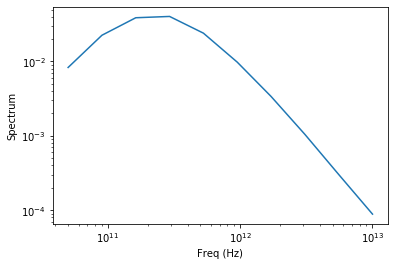

In [9]:
plt.loglog(x.nu,x.spec[0])
plt.ylabel('Spectrum')
plt.xlabel('Freq (Hz)')

### Polarization maps

Same as above but change nvals=4

In [5]:
x.run_pgrtrans(standard=1,nvals=4,fname='HARM',nfreq=10,fmin=5e10,fmax=1e13,ename='POLSYNCHTH',
               spin=0.9375,nn=[150,150, 400],uout=0.04,mbh=4e6, mdotmin=4e15, mdotmax=4e15,nmdot=1, 
               nmu=1,mumin=.6428,mumax=.6428, gridvals=[-13.,13.,-13.,13.], fhfile='dump040', fdfile='dump',
               findf=40,fnt=1,muval=1./4.,gmin=1.)

printing grtrans argument list
1 0.6428 0.6428 1 -0.5 0.9375 0.04 1.0 1.0 2 [-13.0, 13.0, -13.0, 13.0] [150, 150, 400] 1 22500 HARM 5.0 1 1 1 4000000000000000.0 4000000000000000.0 POLSYNCHTH 4000000.0 10 50000000000.0 10000000000000.0 0.25 1.0 100000.0 3.5 3.5 0.02 const T 4 lsoda 1 0 0  dump dump040 dump0000rr2.bin thickdiskrr2 1 40 1 1 500 100 500 0 1 0 1.5 6.0 10000.0 1.0 6.0 0.0001 10000.0 3.3333333333333332e+16 9e+19 10000.0 0.4 1.7 0.1 30000000.0 80000.0 2.9 10.0 0 0.0 0.0 -1.0 100000000.0 -10.0 10.0 0.0 10000.0 1.0 10000000000.0 [1, 1, 1, 1, 1, 1, 1] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [1.0, 1.0] 2


img shape:  (150, 150) 150 150


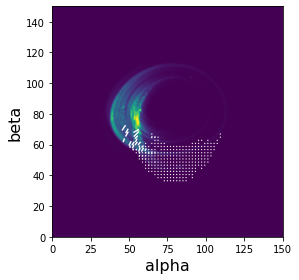

In [8]:
x.disp_pol_map(6,nsamp=2)

now set Faraday coefficients to 0 by adding the following input: emiscoefindx=[1,1,1,1,0,0,0]

In [18]:
x.run_pgrtrans(standard=1,nvals=4,fname='HARM',nfreq=10,fmin=5e10,fmax=1e13,ename='POLSYNCHTH',
               spin=0.9375,nn=[150,150, 400],uout=0.04,mbh=4e6, mdotmin=4e15, mdotmax=4e15,nmdot=1, 
               nmu=1,mumin=.6428,mumax=.6428, gridvals=[-13.,13.,-13.,13.], fhfile='dump040', fdfile='dump',
               findf=40,fnt=1,muval=1./4.,gmin=1.,emiscoefindx=[1,1,1,1,0,0,0])

printing grtrans argument list
1 0.6428 0.6428 1 -0.5 0.9375 0.04 1.0 1.0 2 [-13.0, 13.0, -13.0, 13.0] [150, 150, 400] 1 22500 HARM 5.0 1 1 1 4000000000000000.0 4000000000000000.0 POLSYNCHTH 4000000.0 10 50000000000.0 10000000000000.0 0.25 1.0 100000.0 3.5 3.5 0.02 const T 4 lsoda 1 0 0  dump dump040 dump0000rr2.bin thickdiskrr2 1 40 1 1 500 100 500 0 1 0 1.5 6.0 10000.0 1.0 6.0 0.0001 10000.0 3.3333333333333332e+16 9e+19 10000.0 0.4 1.7 0.1 30000000.0 80000.0 2.9 10.0 0 0.0 0.0 -1.0 100000000.0 -10.0 10.0 0.0 10000.0 1.0 10000000000.0 [1, 1, 1, 1, 1, 1, 1] [1.0, 1.0] 2


No handles with labels found to put in legend.


nsamp change:  0 7 3
nsamp change:  1 6 0
img shape:  (150, 150) 150 150


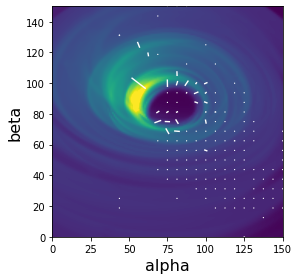

In [19]:
x.disp_pol_map(0)

## Basics of semi analytic (sa) RIAF model

Reference: Yuan, Quataert, Narayan (2003)

*READ PAPER AND COMPLETE*

look at batch in grtrans to see the default values of the parameters

look at test problems file to see how to run

sariaf model doesnt count as example problem because result it disagrees with broderick

change integration method

In [163]:
x.run_pgrtrans(fname='SARIAF',nfreq=1,nmu=1,fmin=95687025.8259654,fmax=95687025.8259654,ename='POLSYNCHTH',
               nvals=1,spin=0.,standard=1,nn=[100,100,500],uout=0.007,mbh=4e6, 
               mdotmin=0.5e13,mdotmax=0.5e13,muval=1.,nmdot=1,mumin=0.7,mumax=0.7,
               gridvals=[-30,30,-30,30],ntscl=5e9,sbl06=1,snscl=3e4,snnthscl=1e4,
               snnthp=2.9,sbeta=10.,gmin=1,iname='formal')

# change resolution to 800 steps
# original nn=[150,150,400]

printing grtrans argument list
1 0.7 0.7 1 -0.5 0.0 0.007 1.0 1.0 2 [-30, 30, -30, 30] [100, 100, 500] 1 10000 SARIAF 5.0 1 1 1 5000000000000.0 5000000000000.0 POLSYNCHTH 4000000.0 1 95687025.8259654 95687025.8259654 1.0 1 100000.0 3.5 3.5 0.02 const T 1 formal 1 0 0  fieldline dump040 dump0000rr2.bin thickdiskrr2 1 5206 1 1 500 100 500 0 1 0 1.5 6.0 10000.0 5000000000.0 6.0 0.0001 10000.0 3.3333333333333332e+16 9e+19 10000.0 0.4 1.7 0.1 30000.0 10000.0 2.9 10.0 1 0.0 0.0 -1.0 100000000.0 -10.0 10.0 0.0 10000.0 1.0 10000000000.0 [1, 1, 1, 1, 1, 1, 1] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [1.0, 1.0] 2


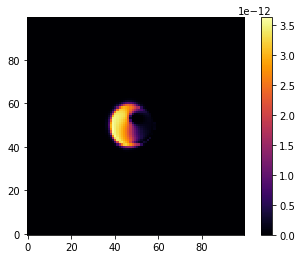

In [164]:
#for i in range(25):
x.disp_pgrtrans_image(0)

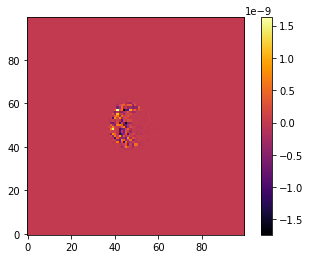

In [117]:
x.disp_pgrtrans_image(-1,2)

In [160]:
x.calc_spec_pgrtrans(x.nx)

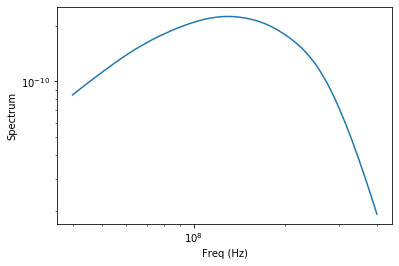

In [161]:
plt.loglog(x.nu,x.spec[0])
plt.ylabel('Spectrum')
plt.xlabel('Freq (Hz)')
plt.show()

In [162]:
x.spec[0]

array([8.46686802e-11, 8.99628060e-11, 9.54633117e-11, 1.01256042e-10,
       1.07334388e-10, 1.13713789e-10, 1.20352165e-10, 1.27212257e-10,
       1.34120616e-10, 1.41254484e-10, 1.48317160e-10, 1.55285676e-10,
       1.62244574e-10, 1.69021273e-10, 1.75587406e-10, 1.82003615e-10,
       1.88398924e-10, 1.94511214e-10, 2.00295799e-10, 2.05764355e-10,
       2.10847794e-10, 2.15199567e-10, 2.18967226e-10, 2.21643605e-10,
       2.23438706e-10, 2.24016394e-10, 2.23446382e-10, 2.21644145e-10,
       2.18900168e-10, 2.15212836e-10, 2.10563425e-10, 2.04707555e-10,
       1.97525137e-10, 1.89387108e-10, 1.80685557e-10, 1.71083114e-10,
       1.60960025e-10, 1.50240145e-10, 1.38175754e-10, 1.25522225e-10,
       1.11702966e-10, 9.77797118e-11, 8.38665035e-11, 7.06919715e-11,
       5.86755892e-11, 4.79860609e-11, 3.87660860e-11, 3.09937509e-11,
       2.45463050e-11, 1.92854379e-11])

In [3]:
# POL MAP
x.run_pgrtrans(standard=1,nvals=4,fname='SARIAF',nfreq=25,fmin=1e10,fmax=4e13,ename='POLSYNCHTH',
               spin=0.,nn=[150,150, 400],uout=0.002,mbh=4e6, mdotmin=0.5e13, mdotmax=0.5e13,nmdot=1, 
               nmu=1,mumin=.707,mumax=.707, gridvals=[-100,100,-100,100],ntscl=1.7e11,sbl06=1,snscl=3e7,
               snnthscl=8e4,snnthp=2.9,sbeta=10./3.,gmin=10.,iname='formal')

printing grtrans argument list
1 0.707 0.707 1 -0.5 0.0 0.002 1.0 1.0 2 [-100, 100, -100, 100] [150, 150, 400] 1 22500 SARIAF 5.0 1 1 1 5000000000000.0 5000000000000.0 POLSYNCHTH 4000000.0 25 10000000000.0 40000000000000.0 0.25 10.0 100000.0 3.5 3.5 0.02 const T 4 formal 1 0 0  fieldline dump040 dump0000rr2.bin thickdiskrr2 1 5206 1 1 500 100 500 0 1 0 1.5 6.0 10000.0 170000000000.0 6.0 0.0001 10000.0 3.3333333333333332e+16 9e+19 10000.0 0.4 1.7 0.1 30000000.0 80000.0 2.9 3.3333333333333335 1 0.0 0.0 -1.0 100000000.0 -10.0 10.0 0.0 10000.0 1.0 10000000000.0 [1, 1, 1, 1, 1, 1, 1] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [1.0, 1.0] 2


nsamp change:  0 7 3
nsamp change:  1 6 0
img shape:  (150, 150) 150 150


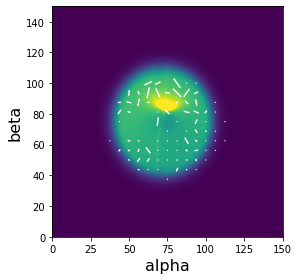

In [4]:
x.disp_pol_map(0)

In [5]:
x.get_pol_vectors()

nsamp change:  0 7 3
nsamp change:  1 6 0
img shape:  (150, 150) 150 150


(array([[  3.,   9.,  15.,  21.,  27.,  33.,  39.,  45.,  51.,  57.,  63.,
          69.,  75.,  81.,  87.,  93.,  99., 105., 111., 117., 123., 129.,
         135., 141., 147.],
        [  3.,   9.,  15.,  21.,  27.,  33.,  39.,  45.,  51.,  57.,  63.,
          69.,  75.,  81.,  87.,  93.,  99., 105., 111., 117., 123., 129.,
         135., 141., 147.],
        [  3.,   9.,  15.,  21.,  27.,  33.,  39.,  45.,  51.,  57.,  63.,
          69.,  75.,  81.,  87.,  93.,  99., 105., 111., 117., 123., 129.,
         135., 141., 147.],
        [  3.,   9.,  15.,  21.,  27.,  33.,  39.,  45.,  51.,  57.,  63.,
          69.,  75.,  81.,  87.,  93.,  99., 105., 111., 117., 123., 129.,
         135., 141., 147.],
        [  3.,   9.,  15.,  21.,  27.,  33.,  39.,  45.,  51.,  57.,  63.,
          69.,  75.,  81.,  87.,  93.,  99., 105., 111., 117., 123., 129.,
         135., 141., 147.],
        [  3.,   9.,  15.,  21.,  27.,  33.,  39.,  45.,  51.,  57.,  63.,
          69.,  75.,  81.,  87.,  9

### w/o changing integration method

In [13]:
# w/o changing integration method
x2 = gr.grtrans()

In [14]:
x2.run_pgrtrans(fname='SARIAF',nfreq=25,nmu=1,fmin=1e10,fmax=4e13,ename='POLSYNCHTH',
               nvals=4,spin=0.,standard=1,nn=[150,150,400],uout=0.002,mbh=4e6, 
               mdotmin=0.5e13,mdotmax=0.5e13,muval=1.,nmdot=1,mumin=.707,mumax=.707,
               gridvals=[-100,100,-100,100],ntscl=1.7e11,sbl06=1,snscl=3e7,snnthscl=8e4,
               snnthp=2.9,sbeta=10./3.,gmin=10.)

printing grtrans argument list
1 0.707 0.707 1 -0.5 0.0 0.002 1.0 1.0 2 [-100, 100, -100, 100] [150, 150, 400] 1 22500 SARIAF 5.0 1 1 1 5000000000000.0 5000000000000.0 POLSYNCHTH 4000000.0 25 10000000000.0 40000000000000.0 1.0 10.0 100000.0 3.5 3.5 0.02 const T 4 lsoda 1 0 0  fieldline dump040 dump0000rr2.bin thickdiskrr2 1 5206 1 1 500 100 500 0 1 0 1.5 6.0 10000.0 170000000000.0 6.0 0.0001 10000.0 3.3333333333333332e+16 9e+19 10000.0 0.4 1.7 0.1 30000000.0 80000.0 2.9 3.3333333333333335 1 0.0 0.0 -1.0 100000000.0 -10.0 10.0 0.0 10000.0 1.0 10000000000.0 [1, 1, 1, 1, 1, 1, 1] [1.0, 1.0] 2


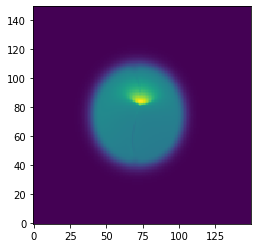

In [16]:
x2.disp_pgrtrans_image(0)

In [17]:
x2.calc_spec_pgrtrans(x2.nx)

Text(0.5, 0, 'Freq (Hz)')

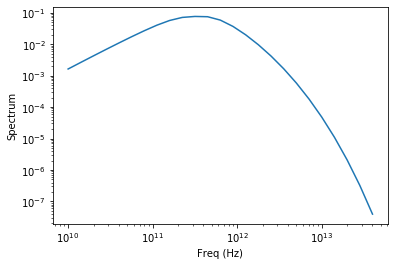

In [18]:
plt.loglog(x2.nu,x2.spec[0])
plt.ylabel('Spectrum')
plt.xlabel('Freq (Hz)')

In [19]:
x2.run_pgrtrans(standard=1,nvals=4,fname='SARIAF',nfreq=25,fmin=1e10,fmax=4e13,ename='POLSYNCHTH',
               spin=0.,nn=[150,150, 400],uout=0.002,mbh=4e6, mdotmin=0.5e13, mdotmax=0.5e13,nmdot=1, 
               nmu=1,mumin=.707,mumax=.707, gridvals=[-100,100,-100,100],ntscl=1.7e11,sbl06=1,snscl=3e7,
               snnthscl=8e4,snnthp=2.9,sbeta=10./3.,gmin=10.)

printing grtrans argument list
1 0.707 0.707 1 -0.5 0.0 0.002 1.0 1.0 2 [-100, 100, -100, 100] [150, 150, 400] 1 22500 SARIAF 5.0 1 1 1 5000000000000.0 5000000000000.0 POLSYNCHTH 4000000.0 25 10000000000.0 40000000000000.0 0.25 10.0 100000.0 3.5 3.5 0.02 const T 4 lsoda 1 0 0  fieldline dump040 dump0000rr2.bin thickdiskrr2 1 5206 1 1 500 100 500 0 1 0 1.5 6.0 10000.0 170000000000.0 6.0 0.0001 10000.0 3.3333333333333332e+16 9e+19 10000.0 0.4 1.7 0.1 30000000.0 80000.0 2.9 3.3333333333333335 1 0.0 0.0 -1.0 100000000.0 -10.0 10.0 0.0 10000.0 1.0 10000000000.0 [1, 1, 1, 1, 1, 1, 1] [1.0, 1.0] 2


No handles with labels found to put in legend.


nsamp change:  0 7 3
nsamp change:  1 6 0
img shape:  (150, 150) 150 150


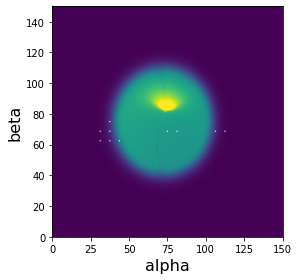

In [20]:
x2.disp_pol_map(0)

### pgrtrans inputs

**1) standard:** method for computing geodesics. =2 for tracing in polar angle (e.g., to the 
equatorial plane of a thin disk) and =1 for tracing in radius (e.g., through an extended 
accretion flow)

**2) nvals:** 1 for Stokes I, 4 for full polarization

**3) fname:** fluid model, analytic or simulation, e.g. 'SARIAF'

**4) fmin,fmax,nfreq:** observed nu (Hz) for nfreq frequencies

**5) ename:** emissivity (mostly various synchrotron emissivities). For example: ename = "POLSYNCHTH"** -- Polarized synchrotron emission from a thermal particle distribution. 
      Emission coefficients from Huang et al. (2009), Dexter (2011) based on Melrose (1983?). 
      Absorption from Kirchoff's assuming LTE.

**6) spin:** a/M in Kerr, dimensionless black hole spin -1 < spin < 1

**7) mbh:** black hole mass in Msun

**8) nn:** number of x pixels, y pixels, and points along each pixel (npts). The camera pixel spacing
is set by (gridvals(2)-gridvals(1))/nn(1), (gridvals(4)-gridvals(3))/nn(2). The geodesic 
resolution is similarly (uout-uin)/nn(3) when standard=1

**9) uout:** 1/r_out, the maximum radius used in rad. trans. calculation. 

**10) mumin, mumax, nmu:** Minimum/maximum/number of mu = cos(i) of observer camera(s). mu=1,0 corresponds to face-on, edge-on.

**11) mdotmin,mdotmax,nmdot:** same for mdot

**12) gridvals:** camera size in units of M, [xmin, xmax, ymin, ymax]

**13) fhfile, fdfile, findf:** fluid model specific inputs (e.g. dump file name, header file name)

**14) fnt:** = 1 "fast light", > 1 load fnt files than one dump file for slow light

**15) muval:** constant fraction of internal energy in e-, 1 / (Tp/Te + 1)
      
### SARIAF model inputs

1) n0

2) t0

3) nnth0

4) pnth

5) beta

6) bl06


### pgrtrans instances

This info is in grtrans_batch.py file

**1) compile_pgrtrans**

**2) run_pgrtrans**

**3) del_pgrtrans_data**

**4) calc_spec_pgrtrans**

**5) disp_pgrtrans_image**